<a href="https://colab.research.google.com/github/sanae-a11y/AI/blob/main/CreditScoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Scoring Application - Decision tree learning**
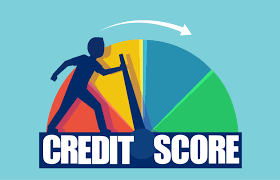

 


---

---
 



**Importing the librairies**


In [ ]:
import matplotlib.pyplot as plt
from numpy import *
import pandas as pd

**Import the dataset**

In [ ]:
file = pd.read_csv("CreditScoring.csv")

**Understanding the data**

In [75]:
file.head(5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
2979,0,16300,34297.0,42629.0,HomeImp,Other,9.0,0.0,0.0,80.489238,2.0,11.0,30.284773
3835,0,20100,20153.0,94279.0,DebtCon,Other,21.0,0.0,0.0,227.182517,2.0,40.0,36.696630
3832,0,20100,74013.0,106578.0,HomeImp,Mgr,13.0,1.0,0.0,164.445811,0.0,27.0,33.916244
3831,0,20100,78915.0,119400.0,DebtCon,Mgr,18.0,0.0,0.0,232.826706,4.0,30.0,36.648680
3826,0,20000,9722.0,173518.0,HomeImp,Mgr,21.0,0.0,0.0,89.211955,2.0,20.0,31.120877


In [ ]:
file.shape

(5960, 13)

In [ ]:
data_types

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

In [ ]:
#descriptive statistics
description= file.describe(include='all') # to get the basic summary of all the numeric columns and frequency distribution of all the categorical columns.
description


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,3364.000000,3364.000000,3364.000000,3364.000000,3364,3364,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.00000,3364.000000
unique,NaN,NaN,NaN,NaN,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,DebtCon,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,2369,1286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.089180,19154.399524,76249.621581,107501.385850,NaN,NaN,9.110285,0.146849,0.278835,180.993684,1.037455,22.11415,34.135451
std,0.285045,10875.418447,45095.372690,54728.240086,NaN,NaN,7.596541,0.579524,0.809631,82.769271,1.549777,9.38733,7.951413
min,0.000000,1700.000000,5076.000000,21144.000000,NaN,NaN,0.000000,0.000000,0.000000,0.486711,0.000000,0.00000,0.838118
25%,0.000000,12000.000000,49351.250000,71235.000000,NaN,NaN,3.000000,0.000000,0.000000,118.687903,0.000000,16.00000,29.362596
50%,0.000000,17000.000000,67278.500000,94453.500000,NaN,NaN,7.000000,0.000000,0.000000,176.742048,1.000000,21.00000,35.129484
75%,0.000000,23825.000000,92986.750000,122339.250000,NaN,NaN,13.000000,0.000000,0.000000,230.402191,2.000000,27.00000,39.087624


**The dependent variable**

A dependent variable is the variable that changes as a result of the independent variable manipulation. It's the outcome you're interested in measuring, and it “depends” on your independent variable.
Then we can say that the dependent variable is the attribute "BAD"  

**Missing Values**

In [ ]:
MissingData=file.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values') # the isnull() returns 1 if the value is null
MissingData

,Variables,Missing Values
0,BAD,0
1,LOAN,0
2,MORTDUE,0
3,VALUE,0
4,REASON,0
5,JOB,0
6,YOJ,0
7,DEROG,0
8,DELINQ,0
9,CLAGE,0


In [ ]:
#dropping rows that have missing data
file.dropna(axis=0, how='any', inplace=True)
file

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
2979,0,16300,34297.0,42629.0,HomeImp,Other,9.0,0.0,0.0,80.489238,2.0,11.0,30.284773
3835,0,20100,20153.0,94279.0,DebtCon,Other,21.0,0.0,0.0,227.182517,2.0,40.0,36.696630
3832,0,20100,74013.0,106578.0,HomeImp,Mgr,13.0,1.0,0.0,164.445811,0.0,27.0,33.916244
3831,0,20100,78915.0,119400.0,DebtCon,Mgr,18.0,0.0,0.0,232.826706,4.0,30.0,36.648680
3826,0,20000,9722.0,173518.0,HomeImp,Mgr,21.0,0.0,0.0,89.211955,2.0,20.0,31.120877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,1,10500,57880.0,66802.0,DebtCon,Other,2.0,0.0,0.0,94.598425,8.0,21.0,45.464766
1329,1,10500,55267.0,65160.0,DebtCon,Other,1.0,0.0,0.0,108.275423,8.0,22.0,47.079285
4348,1,22600,78975.0,103374.0,DebtCon,Mgr,11.0,0.0,0.0,259.319755,1.0,14.0,27.744056
1341,1,10600,61294.0,82646.0,DebtCon,ProfExe,5.0,0.0,4.0,87.859169,2.0,13.0,36.395148


In [ ]:
file.shape

(3364, 13)

**Entropy**

 The English meaning of the word entropy is: it is a state of disorder, confusion, and disorganization.

Claude E. Shannon had expressed this relationship between the probability and the heterogeneity or impurity in the mathematical form with the help of the following equation:

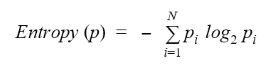

The uncertainty or the impurity is represented as the log to base 2 of the probability of a category (pi). The index (i) refers to the number of possible categories. Here, i = 2 as our problem is a binary classification.

In [ ]:
def Entropie(S):
    S= array(S)
    classes_distinctes = set(S[:, 0])
    classes = list(S[:, 0]) # our classes is BAD : 0 or BAD : 1
    s = 0
    for c in classes_distinctes:
        p = classes.count(c)/len(classes)
        s += p*log2(p)
    return(-1.0*s)


In [71]:
def Mesure_desorde(S, numero_colon_attribut):
    Bonne_mesure_desorde = +inf
    Bonne_valeur_de_repartition = 0
    S = S.to_numpy()
    classes = list(set(S[:, 0]))
    valeurs_attribut = list(set(S[:, numero_colon_attribut]))
    valeurs_attribut.sort()
    Gauche = []
    Droite = []

    for i in range(len(valeurs_attribut)-1):
        v = valeurs_attribut[i]
        Gauche.clear()
        Droite.clear()
        for e in S:
            val_attribut_pour_e = e[numero_colon_attribut]
            if val_attribut_pour_e <= v:
                Gauche.append(e)
            else:
                Droite.append(e)
        pGau = len(Gauche)/len(S)
        pDr = len(Droite)/len(S)
        mesure = (pGau)*GINI(Gauche)+(pDr)*GINI(Droite)
        if mesure < Bonne_mesure_desordre:
            Bonne_mesure_desordre = mesure
            Bonne_valeur_de_repartition = v
    return(Bonne_mesure_desordre, Bonne_valeur_de_repartition)

In [67]:
print(Entropie(file))

0.4337253106573937


**GINI index**

In [ ]:
def GINI(S):
    S = array(S)
    clonne_des_classes = list(S[:, -1])
    classes = list(set(S[:, -1]))
    k = len(classes)
    s = 0
    for i in range(k):
        pi = clonne_des_classes.count(classes[i]/len(S[:, -1]))
        s += pi**2
    return 1-s

In [ ]:
GINI(file)

1

In [ ]:
BAD = file.iloc[:,0]
LOAN = file.iloc[:,1]
MORTDUE = file.iloc[:,1]
type(BAD)

pandas.core.series.Series

**Information Gain**

Information Gain is the pattern observed in the data and is the reduction in entropy. It can also be seen as the entropy of the parent node minus the entropy of the child node. It is calculated as 1 – entropy. 


In [ ]:
def Gain_d_information(S, numero_colon_attribut):
    S = S.to_numpy()
    classes = list(set(S[:, 0]))
    valeurs_attribut = list(set(S[:, numero_colon_attribut]))
    Si = [[]for i in range(len(valeurs_attribut))]
    for e in S:
        e = list(e)
        val_attribut_pour_e = e[numero_colon_attribut]
        numero_sous_ensemble = valeurs_attribut.index(val_attribut_pour_e)
        Si[numero_sous_ensemble].append(e)
    Si = array(Si)
    som = 0
    for sous_ensemble in Si:
        som += (len(sous_ensemble)/len(S))*Entropie(sous_ensemble)
    return(Entropie(S)-som)

Here we use the Information gain for feature selection, by evaluating the gain of each variable in the context of the target variable. In this slightly different usage, the calculation is referred to as mutual information between the two random variables.

In [74]:
print("LOAN :",Gain_d_information(file, 1), "\n",
"MORTDUE :",Gain_d_information(file, 2), "\n",
 "REASON :",Gain_d_information(file, 3), "\n",
"JOB :",Gain_d_information(file, 4), "\n",
"YOJ :",Gain_d_information(file, 5), "\n",
"DEROG :",Gain_d_information(file, 6), "\n",
"DELINQ :",Gain_d_information(file, 7), "\n",
"CLAGE :",Gain_d_information(file, 8), "\n",
"NINQ :",Gain_d_information(file, 9), "\n",
"CLNCO :",Gain_d_information(file, 10), "\n",
 "DEBTING :",Gain_d_information(file, 11))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # This is added back by InteractiveShellApp.init_path()


LOAN : 0.10076895693219562 
 MORTDUE : 0.43075265905216187 
 REASON : 0.43075265905216187 
 JOB : 2.8308664521470295e-05 
 YOJ : 0.006573646444761216 
 DEROG : 0.014966505036512368 
 DELINQ : 0.028405173576032117 
 CLAGE : 0.03645981105047574 
 NINQ : 0.4337253106573937 
 CLNCO : 0.013862803922385647 
 DEBTING : 0.02498007961306159
